In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

pd.set_option('display.max_rows', 12)
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=1.5)

%matplotlib inline
%load_ext autoreload
%autoreload 2

!date

Wed Apr 15 15:40:11 PDT 2020


# LDL-c on the x-axis and RR of Ischemic Stroke on the y axis
## All plots are based on selection of 2016, Brazil, Male, Age 60-64

In [4]:
! which python

/share/code/santonis/miniconda/envs/validation/bin/python


In [5]:
# %cd ~/projects/2018/ceam_development/vivarium_artifact_tools
# %run artifact_tool.py

In [6]:
%cd vivarium_artifact_tools-master
%run artifact_tool.py

/ihme/homes/santonis/notebooks/sanofi_zenon/vivarium_artifact_tools-master


In [7]:
art = ArtifactTool('/share/costeffectiveness/artifacts/vivarium_csu_zenon/brazil.hdf')

In [8]:
from gbd_mapping import risk_factors

# LDL-c

In [21]:
df1 = art.tables.risk_factor.high_ldl_cholesterol.relative_risk.table()



In [22]:
df1 = df1.reset_index()

In [23]:
df1 = df1.melt(id_vars=['location', 'sex', 'age_start', 'age_end', 'year_start', 'year_end', 'affected_entity', 'affected_measure', 'parameter'])

In [26]:
df1 = df1.query('year_start == 2016 and sex == "Male" and age_start == 60.000 and affected_entity == "ischemic_stroke"')


In [27]:
df1

,location,sex,age_start,age_end,year_start,year_end,affected_entity,affected_measure,parameter,variable,value
2181,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_0,1.2075
4757,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_1,1.1575
7333,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_10,1.1935
9909,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_100,1.1740
12485,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_101,1.1835
15061,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_102,1.1485
...,...,...,...,...,...,...,...,...,...,...,...
2562725,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_994,1.2665
2565301,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_995,1.1482
2567877,Brazil,Male,60.0,65.0,2016,2017,ischemic_stroke,incidence_rate,per unit,draw_996,1.0958


In [28]:
df1['age_start'].unique()

array([60.])

In [13]:
risk_factors.high_ldl_cholesterol

RiskFactor(
name='high_ldl_cholesterol',
kind='risk_factor',
gbd_id=reiid(367),
level=2,
most_detailed=True,
distribution='ensemble',
population_attributable_fraction_calculation_type='continuous',
restrictions=Restrictions(
male_only=False,
female_only=False,
yll_only=False,
yld_only=False,
yll_age_group_id_start=10,
yll_age_group_id_end=235,
yld_age_group_id_start=10,
yld_age_group_id_end=235,
violated=[]),
exposure_exists=True,
exposure_standard_deviation_exists=True,
exposure_year_type='annual',
relative_risk_exists=True,
relative_risk_in_range=True,
population_attributable_fraction_yll_exists=True,
population_attributable_fraction_yll_in_range=True,
population_attributable_fraction_yld_exists=True,
population_attributable_fraction_yld_in_range=True,
affected_causes=[all_causes, non_communicable_diseases, cardiovascular_diseases, ischemic_heart_disease, stroke, ischemic_stroke],
population_attributable_fraction_of_one_causes=[],
parent=metabolic_risks,
affected_risk_factors=[high_s

In [29]:
lb_1, ub_1 = np.percentile(df1.value, 2.5), np.percentile(df1.value, 97.5)
rr_1 = df1.value.mean()

In [30]:
rr_1

1.1807644001000002

(0.26149999999999995, 8.368500000000001, 0, 7.0474726947293265)

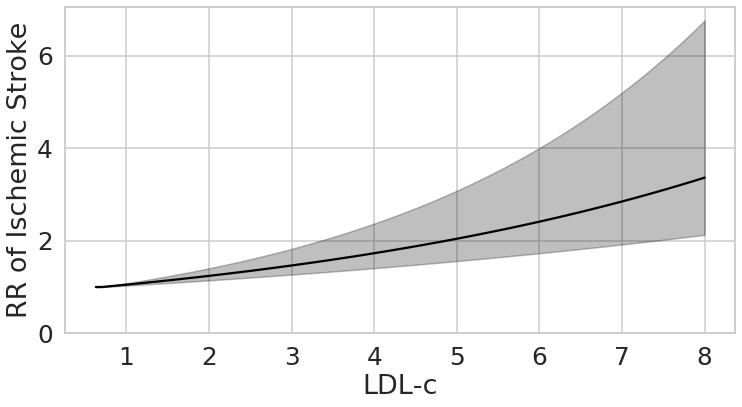

In [31]:
xx = np.linspace(0.63, 8, 100)

max_exposure = 13
scale = 1 
tmrel = 0.70

exposure = np.minimum(xx, max_exposure)
relative_risk = np.maximum(rr_1**((exposure - tmrel) / scale), 1)

yy = relative_risk

yy_lb = np.maximum(lb_1**((exposure - tmrel) / scale), 1)
yy_ub = np.maximum(ub_1**((exposure - tmrel) / scale), 1)

plt.figure(figsize=(12,6))
plt.plot(xx, yy, 'k-')
plt.fill_between(xx, yy_lb, yy_ub, color='k', alpha=.25)
plt.xlabel('LDL-c')
plt.ylabel('RR of Ischemic Stroke')
plt.axis(ymin=0)

# plt.axvline(0.7, color='k', linestyle='dashed')
# plt.axvline(1.3, color='k', linestyle='dashed')
# plt.text(0.72, 1.5, r'TMRED = Uniform(0.7, 1.3)', ha='left', va='bottom', fontsize = 18)



# Code example from Yongquan about FPG

In [7]:
df1 = art.tables.risk_factor.high_fasting_plasma_glucose_continuous.relative_risk.table()

In [8]:
df1 = df1.query('year == 2016 and sex == "Male" and age == 67.5 and cause == "ischemic_heart_disease"')



In [9]:
risk_factors.high_fasting_plasma_glucose_continuous

Risk(
name='high_fasting_plasma_glucose_continuous',
kind='risk_factor',
gbd_id=reiid(141),
distribution='ensemble',
affected_causes=[ischemic_heart_disease,ischemic_stroke,hemorrhagic_stroke,diabetes_mellitus,chronic_kidney_disease_due_to_diabetes_mellitus,chronic_kidney_disease_due_to_hypertension,chronic_kidney_disease_due_to_glomerulonephritis,chronic_kidney_disease_due_to_other_causes],
restrictions=Restrictions(
male_only=False,
female_only=False,
yll_only=False,
yld_only=False,
yll_age_start=None,
yll_age_end=None,
yld_age_start=None,
yld_age_end=None),
levels=None,
tmred=Tmred(
distribution='uniform',
min=scalar(4.884880),
max=scalar(5.301205),
inverted=False),
exposure_parameters=ExposureParameters(
scale=scalar(1.000000),
max_rr=scalar(30.000000)))

In [10]:
lb_1, ub_1 = np.percentile(df1.value, 2.5), np.percentile(df1.value, 97.5)
rr_1 = df1.value.mean()

Text(4.88488, 6, ' TMRED = Uniform(4.884880, 5.301205)')

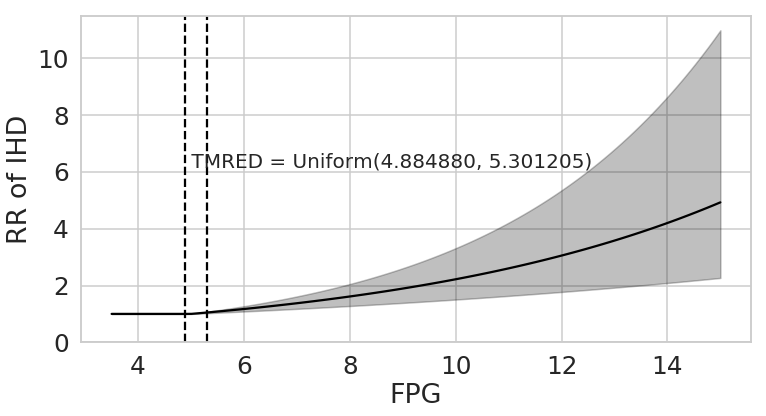

In [11]:
xx = np.linspace(3.5, 15, 100)

max_exposure = 30
scale = 1 
# tmred = uniform(4.884880, 5.301205)
tmrel = 5

exposure = np.minimum(xx, max_exposure)
relative_risk = np.maximum(rr_1**((exposure - tmrel) / scale), 1)

yy = relative_risk

yy_lb = np.maximum(lb_1**((exposure - tmrel) / scale), 1)
yy_ub = np.maximum(ub_1**((exposure - tmrel) / scale), 1)

plt.figure(figsize=(12,6))
plt.plot(xx, yy, 'k-')
plt.fill_between(xx, yy_lb, yy_ub, color='k', alpha=.25)
plt.xlabel('FPG')
plt.ylabel('RR of IHD')
plt.axis(ymin=0)

plt.axvline(4.884880, color='k', linestyle='dashed')
plt.axvline(5.301205, color='k', linestyle='dashed')
plt.text(4.884880, 6, r' TMRED = Uniform(4.884880, 5.301205)', ha='left', va='bottom', fontsize = 20)

# SBP

In [12]:
df2 = art.tables.risk_factor.high_systolic_blood_pressure.relative_risk.table()

In [13]:
df2 = df2.query('year == 2016 and sex == "Male" and age == 67.5 and cause == "ischemic_heart_disease"')

In [14]:
lb_2, ub_2 = np.percentile(df2.value, 2.5), np.percentile(df2.value, 97.5)
rr_2 = df2.value.mean()

In [15]:
risk_factors.high_systolic_blood_pressure

Risk(
name='high_systolic_blood_pressure',
kind='risk_factor',
gbd_id=reiid(107),
distribution='ensemble',
affected_causes=[rheumatic_heart_disease,ischemic_heart_disease,ischemic_stroke,hemorrhagic_stroke,hypertensive_heart_disease,atrial_fibrillation_and_flutter,aortic_aneurysm,peripheral_artery_disease,endocarditis,other_cardiovascular_and_circulatory_diseases,chronic_kidney_disease_due_to_diabetes_mellitus,chronic_kidney_disease_due_to_hypertension,chronic_kidney_disease_due_to_glomerulonephritis,chronic_kidney_disease_due_to_other_causes,other_cardiomyopathy],
restrictions=Restrictions(
male_only=False,
female_only=False,
yll_only=False,
yld_only=False,
yll_age_start=None,
yll_age_end=None,
yld_age_start=None,
yld_age_end=None),
levels=None,
tmred=Tmred(
distribution='uniform',
min=scalar(110.000000),
max=scalar(115.000000),
inverted=False),
exposure_parameters=ExposureParameters(
scale=scalar(10.000000),
max_rr=scalar(200.000000)))

Text(110, 6, ' TMRED = Uniform(110, 115)')

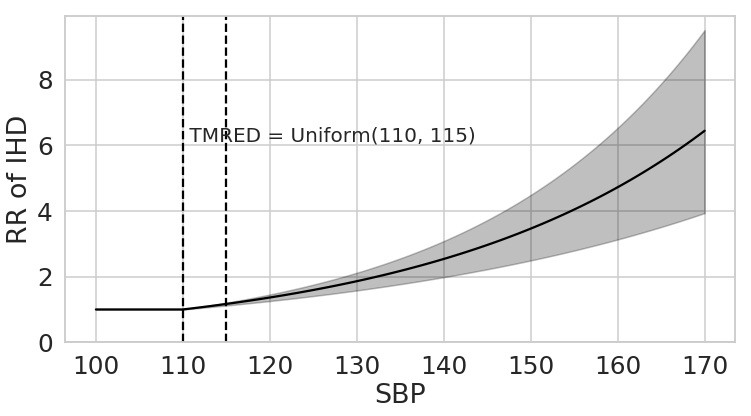

In [16]:
xx = np.linspace(100, 170, 100)

max_exposure = 200
scale = 10 
# tmred = uniform(110, 115)
tmrel = 110

exposure = np.minimum(xx, max_exposure)
relative_risk = np.maximum(rr_2**((exposure - tmrel) / scale), 1)

yy = relative_risk

yy_lb = np.maximum(lb_2**((exposure - tmrel) / scale), 1)
yy_ub = np.maximum(ub_2**((exposure - tmrel) / scale), 1)

plt.figure(figsize=(12,6))
plt.plot(xx, yy, 'k-')
plt.fill_between(xx, yy_lb, yy_ub, color='k', alpha=.25)
plt.xlabel('SBP')
plt.ylabel('RR of IHD')
plt.axis(ymin=0)

plt.axvline(110, color='k', linestyle='dashed')
plt.axvline(115, color='k', linestyle='dashed')
plt.text(110, 6, r' TMRED = Uniform(110, 115)', ha='left', va='bottom', fontsize = 20)

# Smoking

In [17]:
df3 = art.tables.risk_factor.smoking_prevalence_approach.relative_risk.table()

In [18]:
df3 = df3.query('year == 2016 and sex == "Male" and age == 67.5 and cause == "ischemic_heart_disease"')

In [19]:
risk_factors.smoking_prevalence_approach

Risk(
name='smoking_prevalence_approach',
kind='risk_factor',
gbd_id=reiid(166),
distribution='dichotomous',
affected_causes=[lower_respiratory_infections,ischemic_heart_disease,ischemic_stroke,hemorrhagic_stroke,hypertensive_heart_disease,atrial_fibrillation_and_flutter,aortic_aneurysm,peripheral_artery_disease,other_cardiovascular_and_circulatory_diseases,asthma,peptic_ulcer_disease,gallbladder_and_biliary_diseases,alzheimer_disease_and_other_dementias,parkinson_disease,multiple_sclerosis,diabetes_mellitus,rheumatoid_arthritis,low_back_pain,cataract,macular_degeneration,pedestrian_road_injuries,cyclist_road_injuries,motorcyclist_road_injuries,motor_vehicle_road_injuries,other_road_injuries,other_transport_injuries,falls,other_exposure_to_mechanical_forces,non_venomous_animal_contact,physical_violence_by_other_means,exposure_to_forces_of_nature,drug_susceptible_tuberculosis,multidrug_resistant_tuberculosis_without_extensive_drug_resistance,extensively_drug_resistant_tuberculosis],
res

In [20]:
# cat1 exposed
lb_3_cat1, ub_3_cat1 = np.percentile(df3[df3.parameter == 'cat1'].value, 2.5), np.percentile(df3[df3.parameter == 'cat1'].value, 97.5)
rr_3_cat1 = df3[df3.parameter == 'cat1'].value.mean()
# cat2 unexposed

Text(0, 0.5, 'RR of IHD')

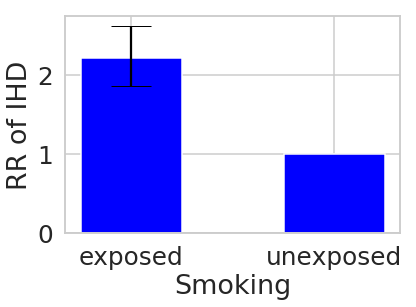

In [21]:
plt.bar(1, rr_3_cat1, yerr = [[rr_3_cat1 - lb_3_cat1], [ub_3_cat1 - rr_3_cat1]], width = 0.5, capsize = 20, color = 'b')
plt.bar(2, 1, width = 0.5, color = 'b')
plt.xticks([1, 2], ['exposed', 'unexposed'])
plt.xlabel('Smoking')
plt.ylabel('RR of IHD')

# IKF

In [22]:
df4 = art.tables.risk_factor.impaired_kidney_function.relative_risk.table()

In [23]:
df4 = df4.query('year == 2016 and sex == "Male" and age == 67.5 and cause == "ischemic_heart_disease"')

In [24]:
risk_factors.impaired_kidney_function

Risk(
name='impaired_kidney_function',
kind='risk_factor',
gbd_id=reiid(341),
distribution='polytomous',
affected_causes=[ischemic_heart_disease,ischemic_stroke,hemorrhagic_stroke,peripheral_artery_disease,chronic_kidney_disease_due_to_diabetes_mellitus,chronic_kidney_disease_due_to_hypertension,chronic_kidney_disease_due_to_glomerulonephritis,chronic_kidney_disease_due_to_other_causes,gout],
restrictions=Restrictions(
male_only=False,
female_only=False,
yll_only=False,
yld_only=False,
yll_age_start=None,
yll_age_end=None,
yld_age_start=None,
yld_age_end=None),
levels=Levels(
cat1='albuminuria',
cat2='stage_iii_chronic_kidney_disease',
cat3='stage_iv_chronic_kidney_disease',
cat4='stage_v_chronic_kidney_disease',
cat5='unexposed',
cat6=None,
cat7=None,
cat8=None,
cat9=None,
cat10=None,
cat11=None,
cat12=None,
cat13=None,
cat14=None,
cat15=None,
cat16=None,
cat17=None,
cat18=None,
cat19=None,
cat20=None,
cat21=None,
cat22=None,
cat23=None,
cat24=None,
cat25=None,
cat26=None,
cat27=None,

In [25]:
# cat1 albuminuria
lb_4_cat1, ub_4_cat1 = np.percentile(df4[df4.parameter == 'cat1'].value, 2.5), np.percentile(df4[df4.parameter == 'cat1'].value, 97.5)
rr_4_cat1 = df4[df4.parameter == 'cat1'].value.mean()

# cat2 stage_iii_chronic_kidney_disease
lb_4_cat2, ub_4_cat2 = np.percentile(df4[df4.parameter == 'cat2'].value, 2.5), np.percentile(df4[df4.parameter == 'cat2'].value, 97.5)
rr_4_cat2 = df4[df4.parameter == 'cat2'].value.mean()

# cat3 stage_iv_chronic_kidney_disease
lb_4_cat3, ub_4_cat3 = np.percentile(df4[df4.parameter == 'cat3'].value, 2.5), np.percentile(df4[df4.parameter == 'cat3'].value, 97.5)
rr_4_cat3 = df4[df4.parameter == 'cat3'].value.mean()

# cat4 stage_v_chronic_kidney_disease
lb_4_cat4, ub_4_cat4 = np.percentile(df4[df4.parameter == 'cat4'].value, 2.5), np.percentile(df4[df4.parameter == 'cat4'].value, 97.5)
rr_4_cat4 = df4[df4.parameter == 'cat4'].value.mean()

# cat5 unexposed

Text(0, 0.5, 'RR of IHD')

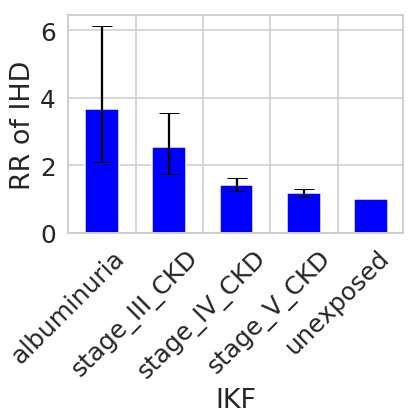

In [26]:
plt.bar(1, rr_4_cat1, yerr = [[rr_4_cat1 - lb_4_cat1], [ub_4_cat1 - rr_4_cat1]], width = 0.5, capsize = 10, color = 'b')
plt.bar(2, rr_4_cat2, yerr = [[rr_4_cat2 - lb_4_cat2], [ub_4_cat2 - rr_4_cat2]], width = 0.5, capsize = 10, color = 'b')
plt.bar(3, rr_4_cat3, yerr = [[rr_4_cat3 - lb_4_cat3], [ub_4_cat3 - rr_4_cat3]], width = 0.5, capsize = 10, color = 'b')
plt.bar(4, rr_4_cat4, yerr = [[rr_4_cat4 - lb_4_cat4], [ub_4_cat4 - rr_4_cat4]], width = 0.5, capsize = 10, color = 'b')
plt.bar(5, 1, width = 0.5, color = 'b')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['albuminuria', 'stage_III_CKD', 'stage_IV_CKD', 'stage_V_CKD', 'unexposed'], rotation = 45)
plt.xlabel('IKF')
plt.ylabel('RR of IHD')

# Sex will not affect RR value, Age dose
# Unexposed RR value is a fixed number = 1